In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Critical stiffness and patch size

The nessecary condition for slip instability is given by:

$-K>\frac{(a-b)\sigma_n'}{D_c}$ ; also written as: $K<\frac{(b-a)\sigma_n'}{D_c}$

where $K$ is the stiffness of the fault, $a-b$ is difference in frictional rate parameters, $\sigma_n'$ is the effective normal stress, and $D_c$ is the critical slip distance. 

We can then define a critical value, $K_c$ which is equal to the right hand side:

$K<K_c=\frac{(b-a)\sigma_n'}{D_c}$

Given a crack of arbritary size, the shear stiffness of the material is:

$K = \frac{E}{2(1-\nu^2)L}$

where E is the youngs modulus, $\nu$ is the Poissons ratio and L is the length of the slipping region (diameter of the crack?). By substituting the second equation into K of the first equation, the nessecary condition for slip instability becomes:

$\frac{E}{2(1-\nu^2)L} < \frac{(b-a)\sigma_n'}{D_c}$

The only variable on the left hand side is the length, thus at some critical length the two sides are equal and the nessecary condition for slip will be met:

$L_c = \frac{ED_c}{2(1-\nu^2)\sigma_n'(b-a)}$

In [2]:
#Parameter values:
#youngs modulus E for granite: 30 - 60 GPa
#poissons ratio for granite is 0.25
#Shear modulus for clays: 350 MPa, poissons ratio for clays between 0.4 (higher pressure) and 0.5 (lower P)
#This is a youngs of 980 MPa and 1.05 GPa respectively

#compute Kc with a,b,Dc,and normal stress. units are in Pa/m
#Dc needs to be in meters
def Kc(c,sn,dc):
    #Sn in MPa, convert to Pa
    sn = sn*1e6
    #c is stand-in for b-a
    kc = ((c)*sn)/dc
    return(kc)

#Computes material K with penny shaped crack of diameter L(meters). Units are Pa/m
def mat_K(E,v,L):
    #youngs modulus in GPa, L in meters
    E=E*1e9
    k = (E)/(2*(1-v**2)*L)
    return(k)

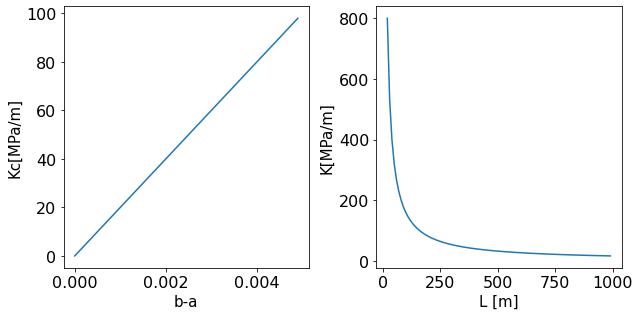

In [3]:
fig = plt.figure(figsize=(9,4.5))
plt.subplot(121)
plt.plot(np.arange(0.0,0.005,0.0001),Kc(np.arange(0.0,0.005,0.0001),10,5e-4)/1e6)
plt.ylabel('Kc[MPa/m]',fontsize=15)
plt.xlabel('b-a',fontsize=15)
plt.tick_params(axis='both',labelsize=16)

plt.subplot(122)
plt.plot(np.arange(20,1e3,10),mat_K(30,0.25,np.arange(20,1e3,10))/1e6)
plt.ylabel('K[MPa/m]',fontsize=15)
plt.xlabel('L [m]',fontsize=15)
plt.tick_params(axis='both',labelsize=16)
plt.tight_layout()

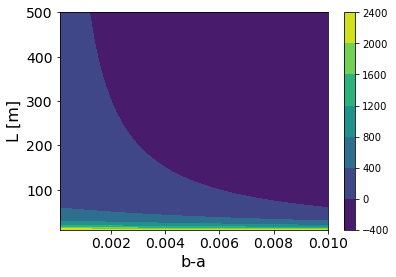

In [4]:
c = np.linspace(0.0001,0.01,200)
L = np.linspace(10,500,200)

dc = [1e-5,1e-4,5e-4]
sn = [5,25,50]

xx,yy = np.meshgrid(c,L)

K_c=Kc(xx,20,5e-4)/1e6
K = mat_K(45,0.25,yy)/1e6

h = plt.contourf(c,L,K-K_c)
#plt.axis('scaled')
plt.colorbar()
plt.ylabel('L [m]',fontsize=16)
plt.xlabel('b-a',fontsize=16)
plt.tick_params(axis='both',labelsize=14)

Plots show the relationship betwee b-a and critical patch size L for contours defined by $log(K/K_c)$. A contour value of 0 is equivalent to $K/K_c = 1$. Negative contours satisfy $K<K_c$ and are in the unstable region.

Below is plotted the parameters Lc and b-a and contoured by the ratio of K to K_c. This is only for granite which has a youngs modulus, E, of 45 GPa and a Poissons ratio of 0.25.

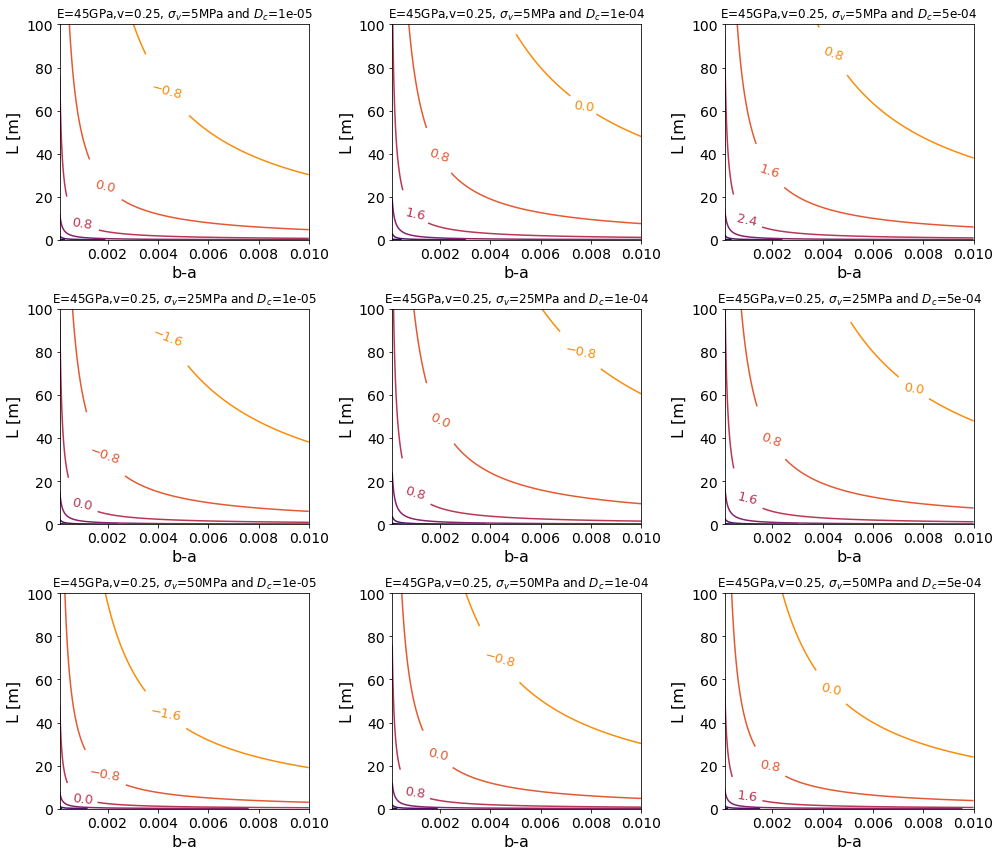

In [15]:
c = np.linspace(0.0001,0.01,2000)
L = np.linspace(0.1,500,2000)

dc = [1e-5,1e-4,5e-4]
sn = [5,25,50]

xx,yy = np.meshgrid(c,L)

manual_locations = [(0.009, 450), (0.008, 200), (0.0045, 100), (0.002, 50),(0.001,10)]

fig=plt.figure(figsize=(14,12))
k=0
for i in range(len(sn)):
    for j in range(len(sn)):
        k+=1
        plt.subplot(len(sn),len(sn),k)
        K_c=Kc(xx,sn[i],dc[j])/1e6
        K = mat_K(45,0.25,yy)/1e6
        h = plt.contour(c,L,np.log10(K/K_c),cmap = 'inferno_r',levels=7)
        plt.clabel(h, inline=True, fontsize=13,manual = manual_locations)
        #plt.colorbar()
        plt.ylim([0,100])
        plt.ylabel('L [m]',fontsize=16)
        plt.xlabel('b-a',fontsize=16)
        plt.tick_params(axis='both',labelsize=14)
        plt.title('E=45GPa,v=0.25, $\sigma_v$=%.0fMPa and $D_c$=%.0e'%(sn[i],dc[j]))
        plt.tight_layout()

Below is plotted the parameters Lc and b-a and contoured by the ratio of K to K_c. This is only for mudstones which has a youngs modulus, E, of 1 GPa and a Poissons ratio of 0.45.

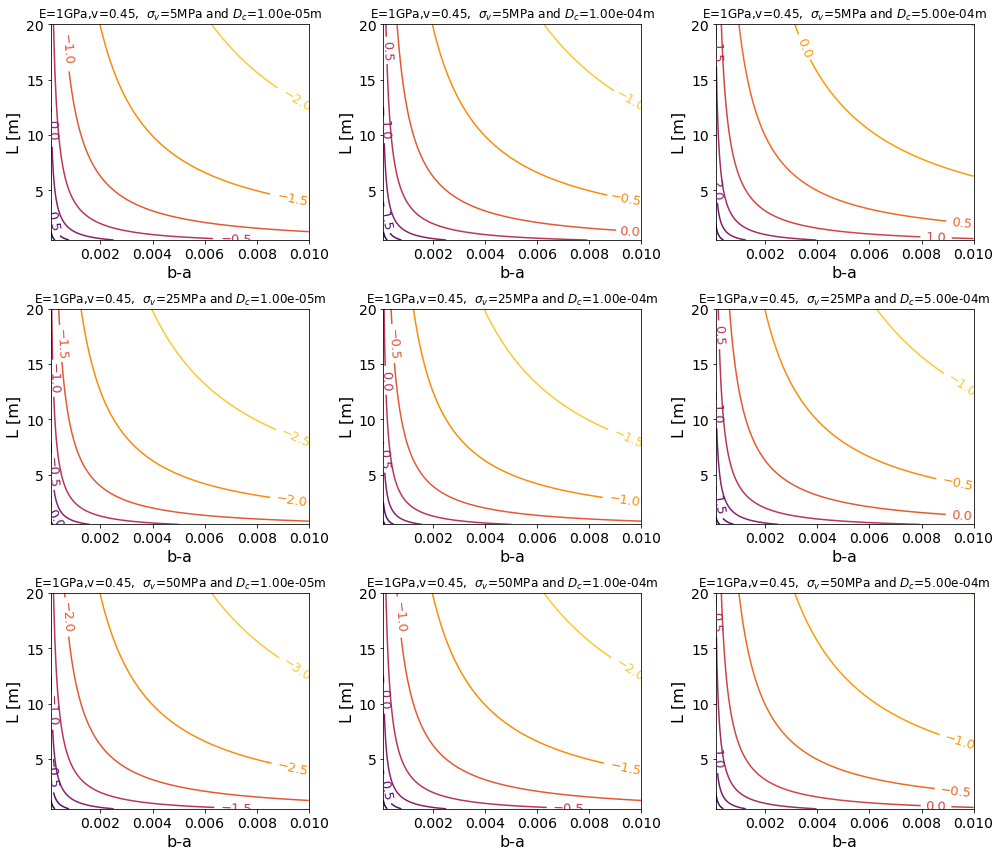

In [18]:
#b-a
c = np.linspace(0.0001,0.01,200)
#crack diameter in m
L = np.linspace(0.5,20,200)

dc = [1e-5,1e-4,5e-4]
sn = [5,25,50]

xx,yy = np.meshgrid(c,L)

#manual_locations = [(0.009, 15), (0.008, 9), (0.0045, 5), (0.002, 2),(0.001,1)]

fig=plt.figure(figsize=(14,12))
k=0
for i in range(len(sn)):
    for j in range(len(sn)):
        k+=1
        plt.subplot(len(sn),len(sn),k)
        K_c=Kc(xx,sn[i],dc[j])/1e6
        K = mat_K(1,0.45,yy)/1e6
        h = plt.contour(c,L,np.log10(K/K_c),cmap='inferno_r')
        #plt.yscale('log')
        #plt.xscale('log')
        plt.clabel(h, inline=True, fontsize=13)#,manual=manual_locations)
        plt.ylabel('L [m]',fontsize=16)
        plt.xlabel('b-a',fontsize=16)
        #plt.xlim([0,0.001])
        #plt.ylim([0,5])
        plt.tick_params(axis='both',labelsize=14)
        plt.title('E=1GPa,v=0.45,  $\sigma_v$=%.0fMPa and $D_c$=%.2em'%(sn[i],dc[j]))
        plt.tight_layout()